# California House Price

In [3]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [4]:
df = pd.read_csv("housing.csv")
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
df.shape

(20640, 10)

* data has 20640 rows
* 10 columns 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* most data has float values
* ocean proximity is object type

In [7]:
df.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

* BR has empty values
* mean location is (-119.56,35.63)
* rooms is in range (2,39320)
* BR (1,6445)
* house value (14999,500001)

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
%pip install nbformat


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import plotly.express as px
df2=df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]
fig = px.scatter_matrix(df2,
    dimensions=['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'])

fig.update_traces(marker=dict(size=1, line=dict(width=1, color="DarkSlateGrey")))
fig.update_traces(diagonal_visible=False)
fig.show()

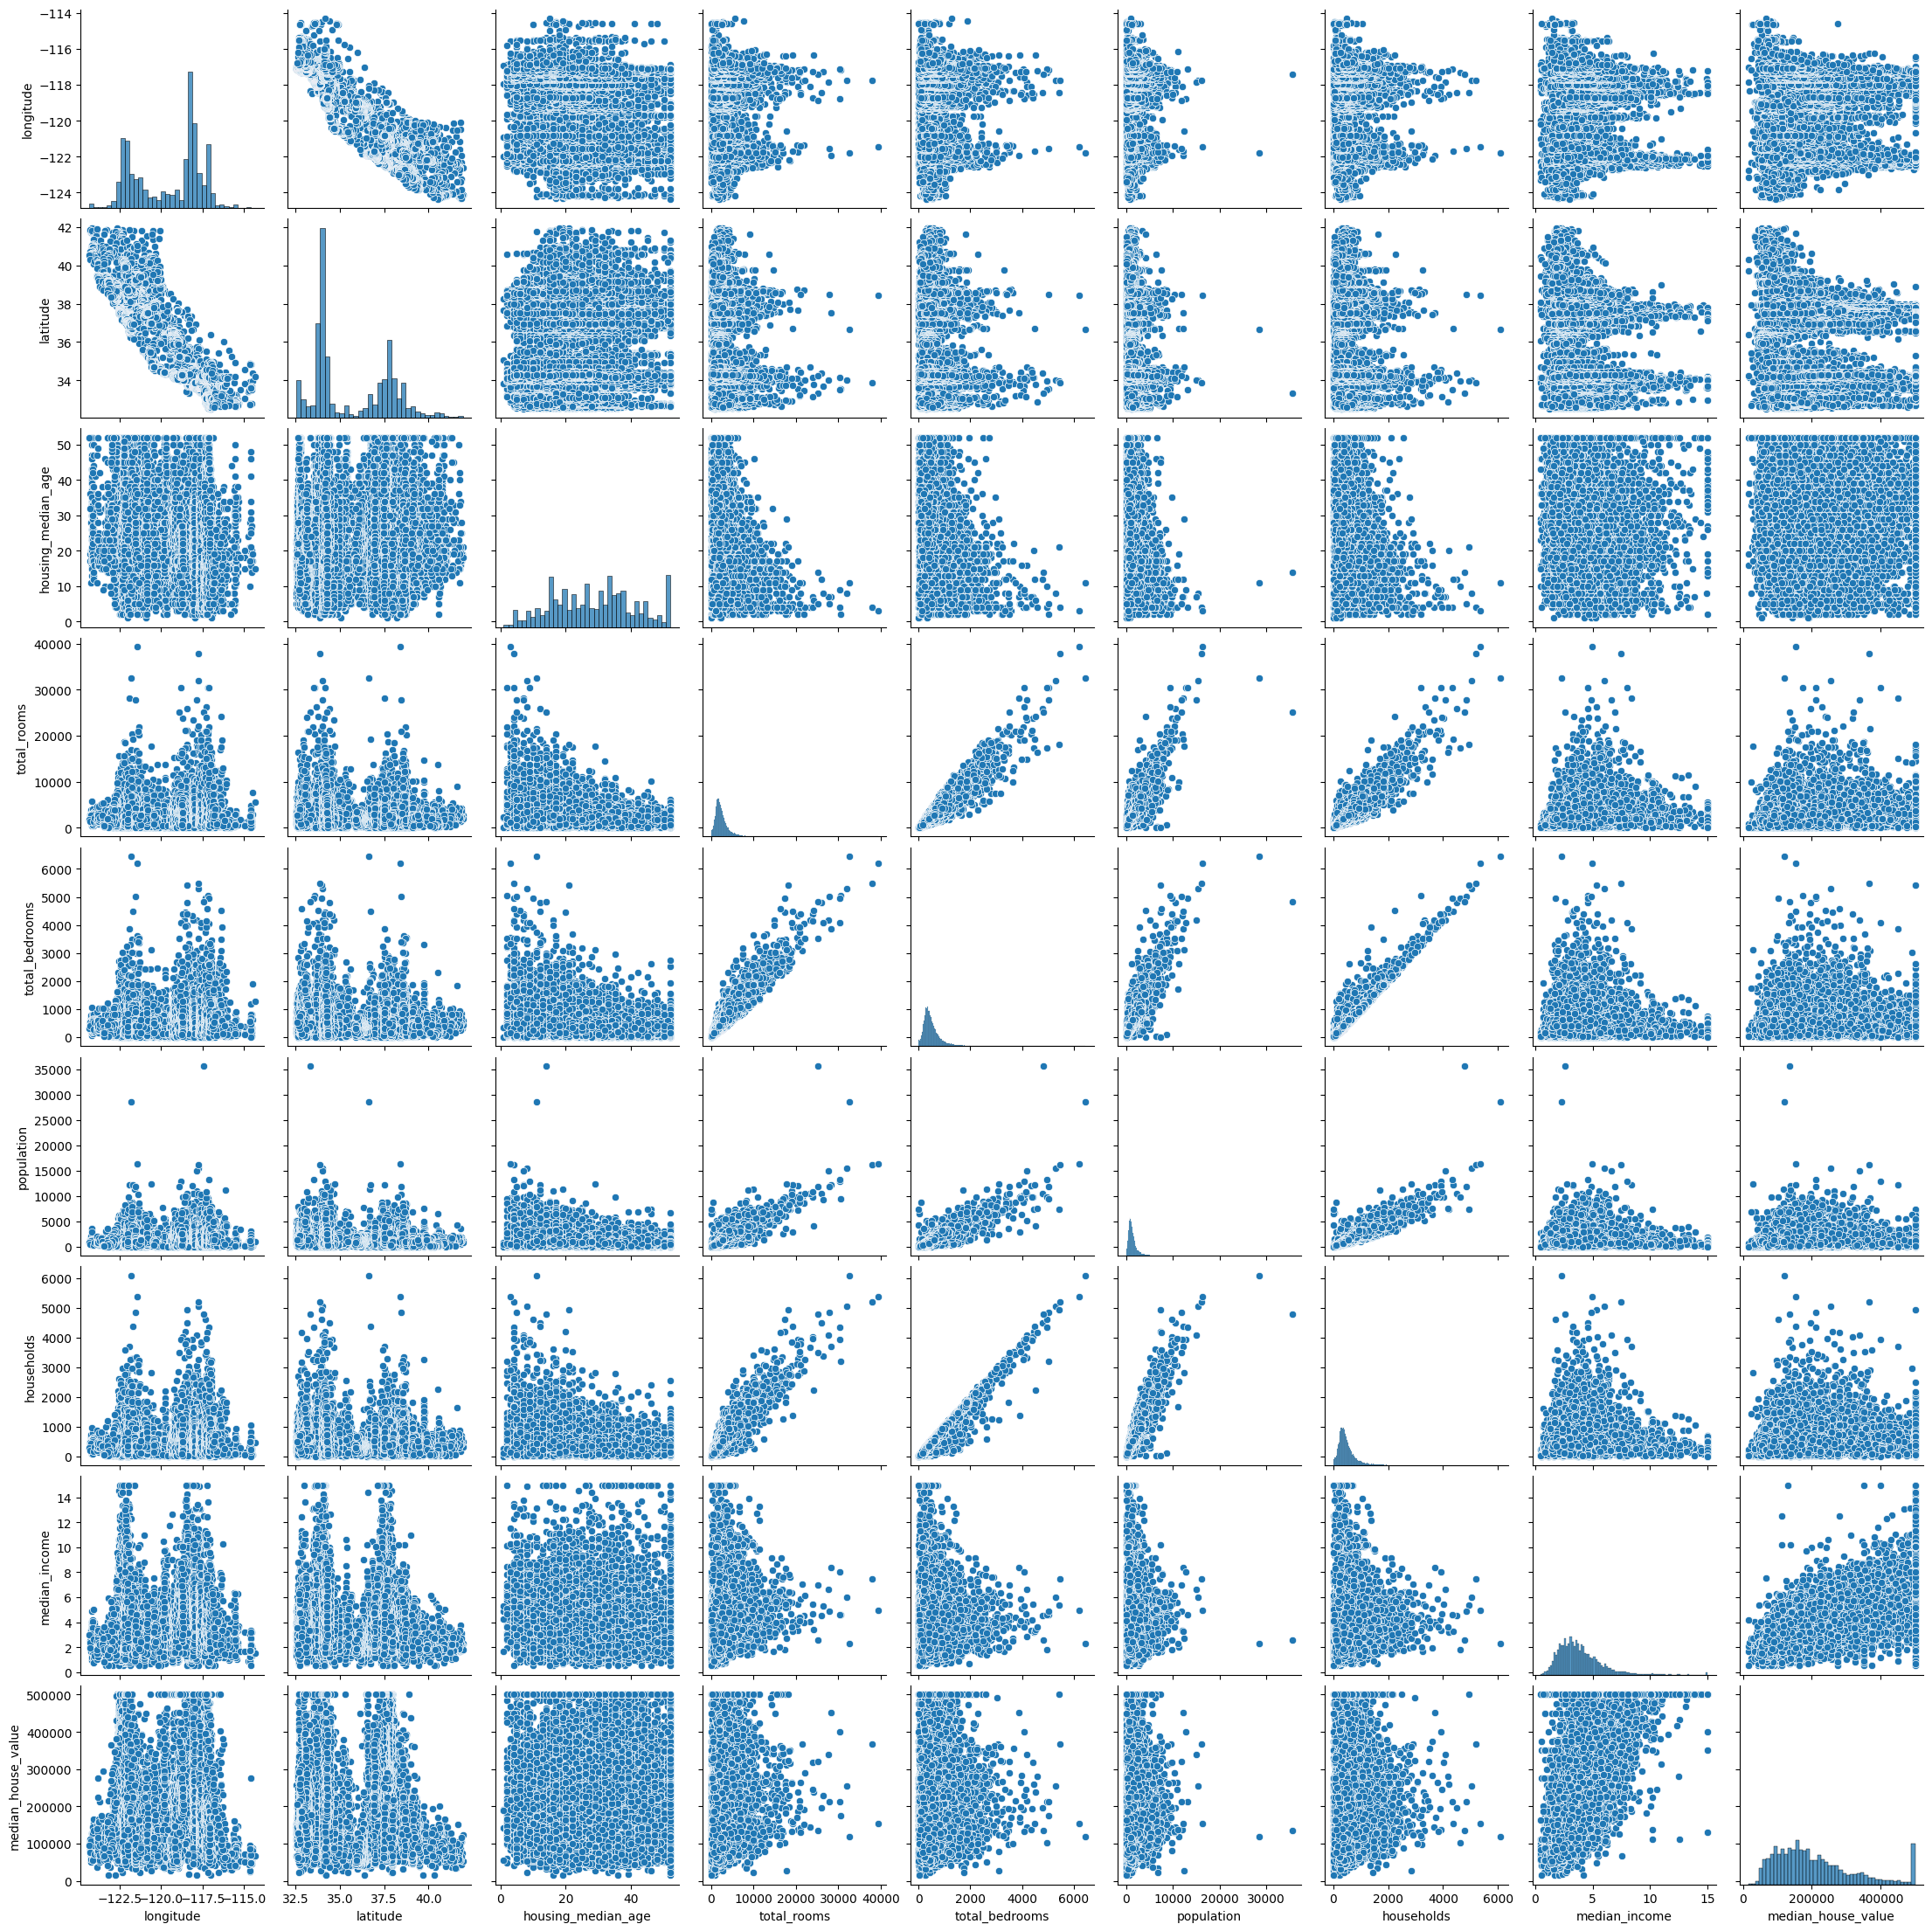

In [11]:
sns.pairplot(data=df)

## Missing value

In [12]:
mv=df.isnull().sum()
mv

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Bedrooms are empty

In [13]:
(round(df.isna().sum() * 100 / df.shape[0], 2)).astype(str) + "%"

longitude             0.0%
latitude              0.0%
housing_median_age    0.0%
total_rooms           0.0%
total_bedrooms        1.0%
population            0.0%
households            0.0%
median_income         0.0%
median_house_value    0.0%
ocean_proximity       0.0%
dtype: object

In [14]:
df.total_bedrooms.fillna(method='ffill',inplace=True)

In [15]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Data is filled

In [16]:
df.duplicated().sum()

np.int64(0)

No Duplicate data

### checking outliers

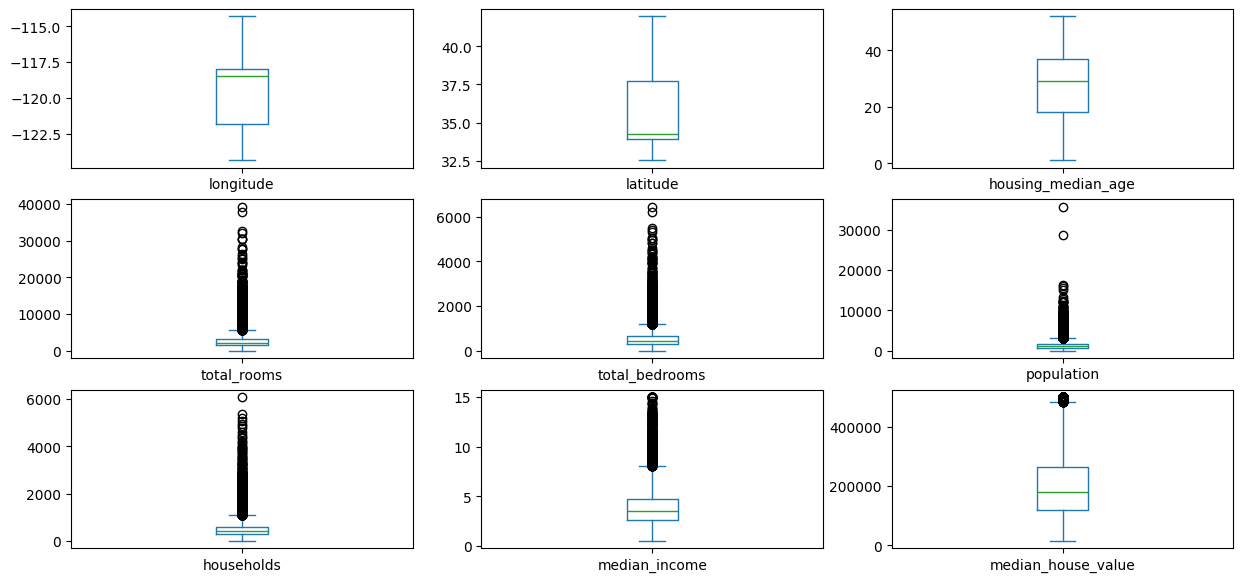

In [17]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

boxplot of all the values
1.  outliers
* total_rooms
* total_bedrooms
* population
*  households
* median_income

In [18]:
df=df[df['total_rooms']<df['total_rooms'].quantile(0.8)]
df=df[df['total_bedrooms']<df['total_bedrooms'].quantile(0.8)]
df=df[df['population']<df['population'].quantile(0.8)]
df=df[df['households']<df['households'].quantile(0.8)]
df=df[df['median_income']<df['median_income'].quantile(0.8)]

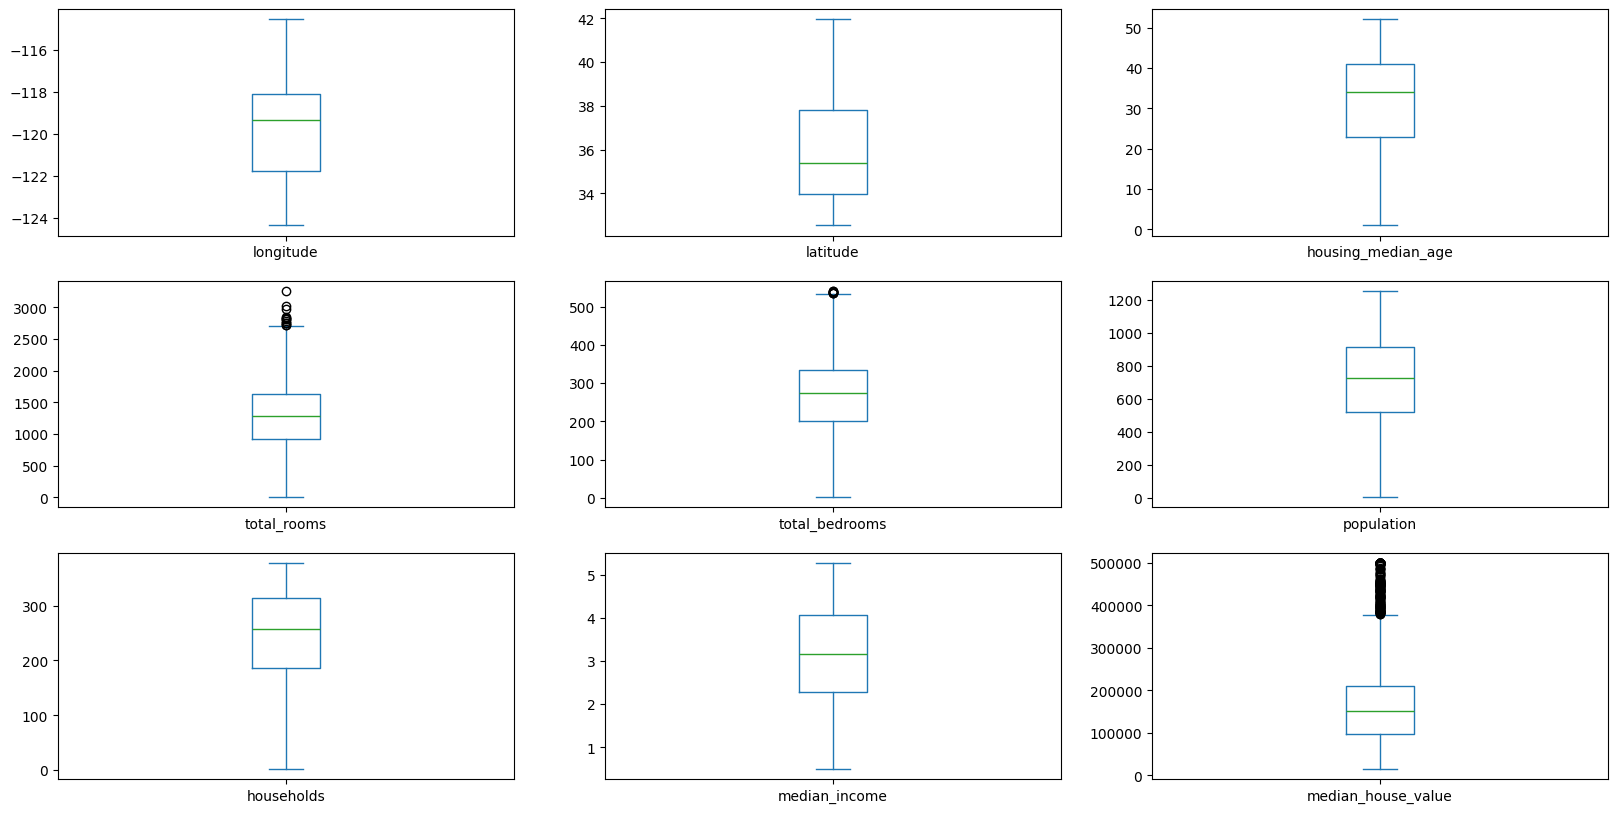

In [19]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(20,10))
plt.show()

# EDA

In [20]:
#only object data
ov = df["ocean_proximity"].value_counts()
ov

ocean_proximity
INLAND        2676
<1H OCEAN     2559
NEAR OCEAN     751
NEAR BAY       750
ISLAND           4
Name: count, dtype: int64

In [21]:
df.count()

longitude             6740
latitude              6740
housing_median_age    6740
total_rooms           6740
total_bedrooms        6740
population            6740
households            6740
median_income         6740
median_house_value    6740
ocean_proximity       6740
dtype: int64

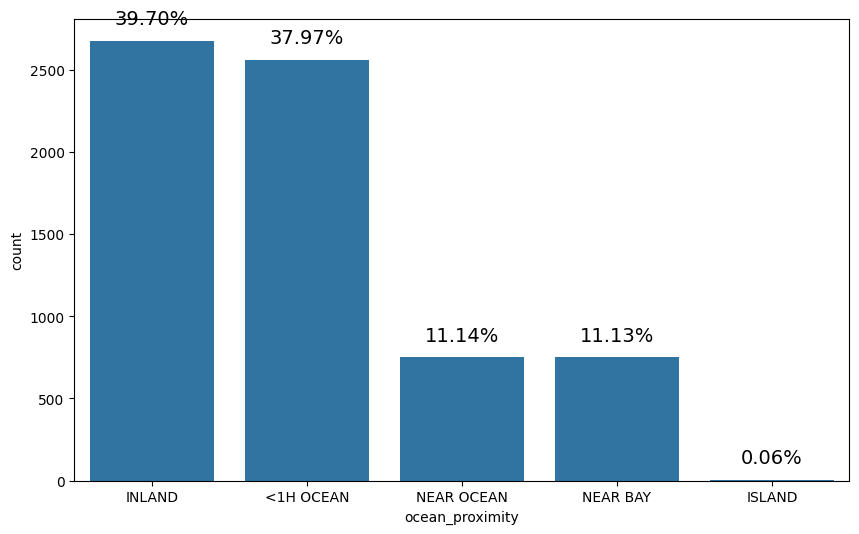

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x = "ocean_proximity",data=df,order=ov.index)

# showing the percenotge
for i in range(ov.shape[0]):
    count = ov[i] 
    strt='{:0.2f}%'.format(100*count / df.shape[0]) 
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14) 

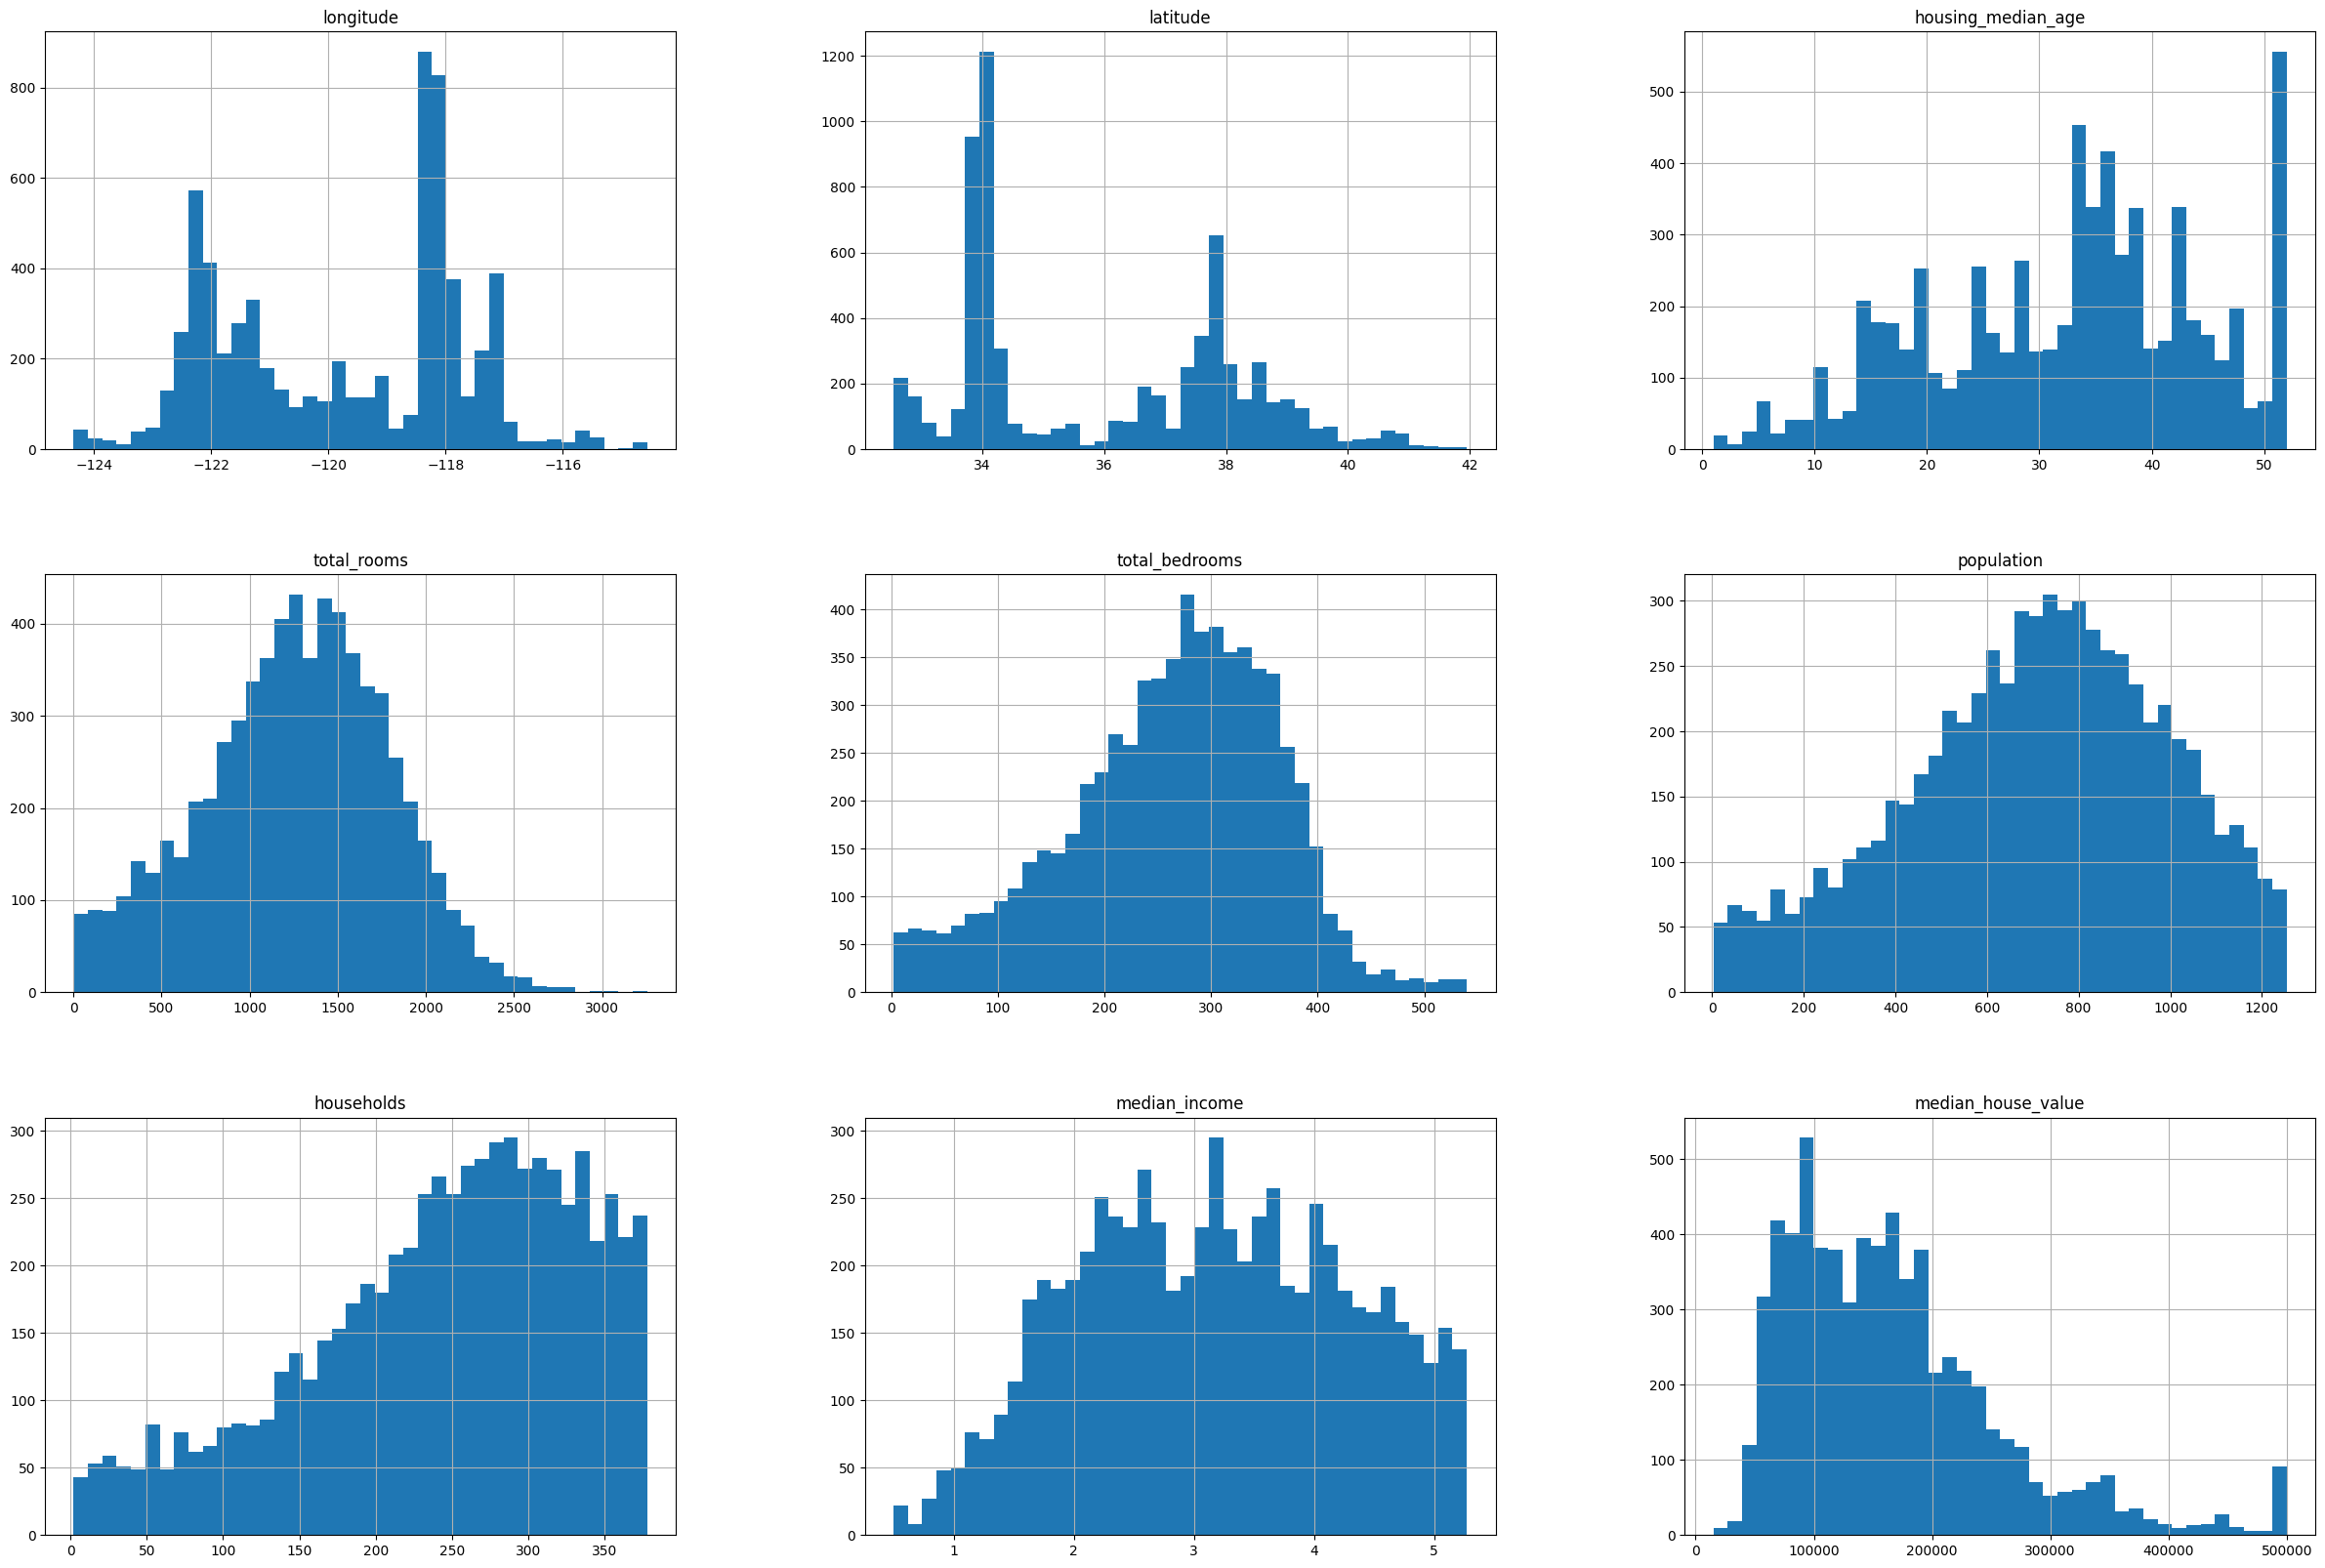

In [23]:
df.hist(bins=40,figsize=(30,20));


Several features display noticeable skewness, which may affect model performance and benefit from transformation or scaling.

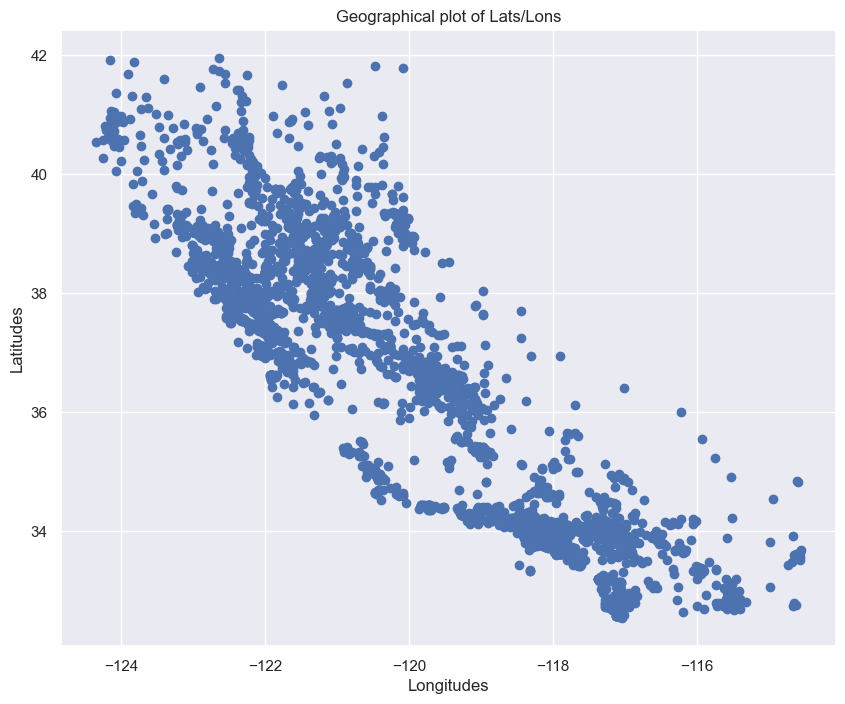

In [24]:
sns.set()
plt.figure(figsize=(10,8))#Figure size
plt.scatter('longitude','latitude',data=df)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

<Figure size 1000x700 with 0 Axes>

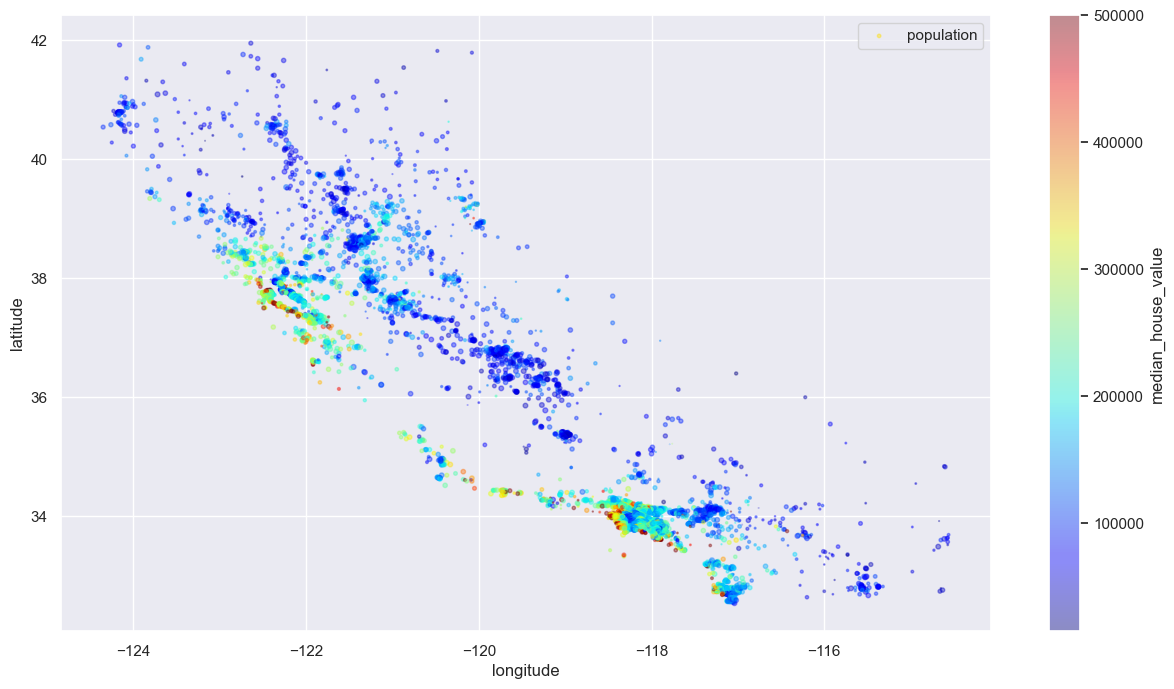

In [25]:
plt.figure(figsize=(10,7));
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    );
plt.legend();

In [27]:
%pip install folium

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/3 [xyzservices]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]

Note: you may need to restart the kernel to use updated packages.


In [28]:
import patsy
import folium as folium
from folium import plugins
from folium.plugins import HeatMap
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map

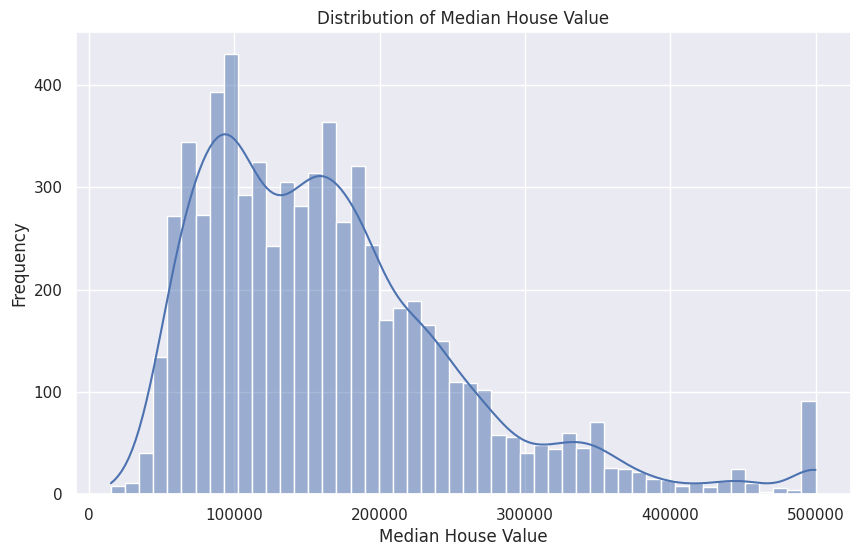

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

**Observation: The median house value distribution is right-skewed, with a peak around 150,000 and another smaller peak around the maximum value of 500,000.**

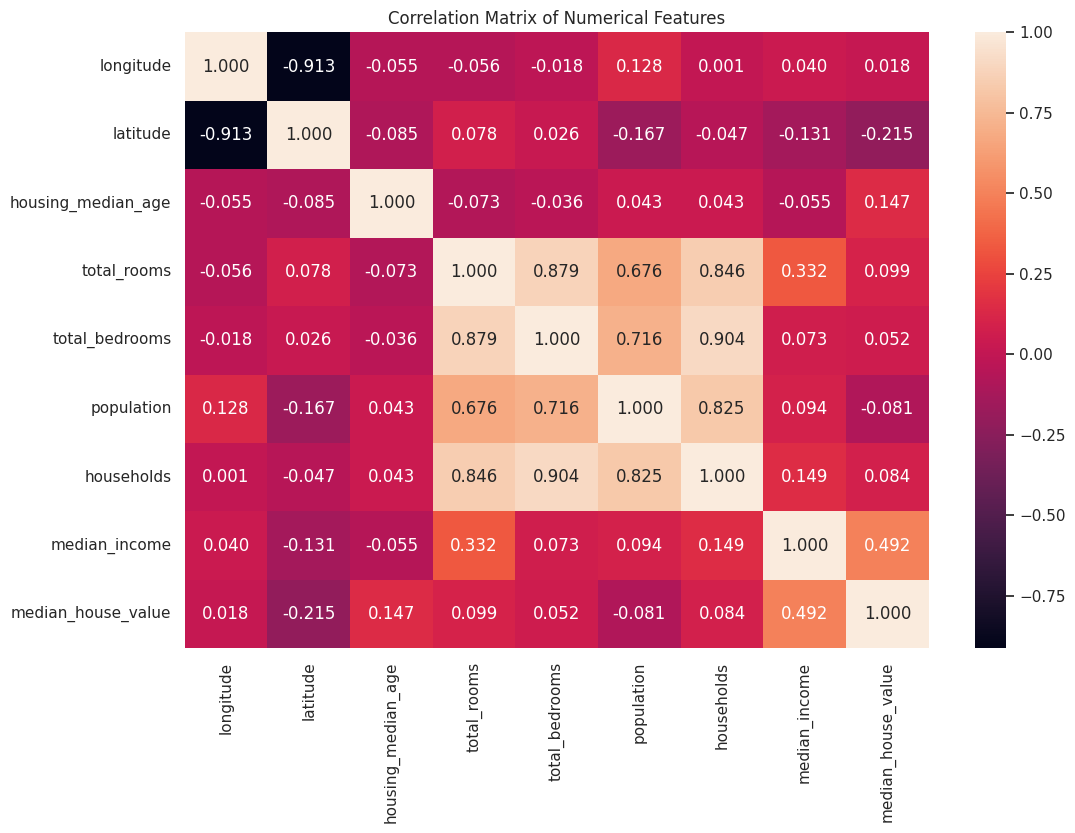

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True,  fmt=".3f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

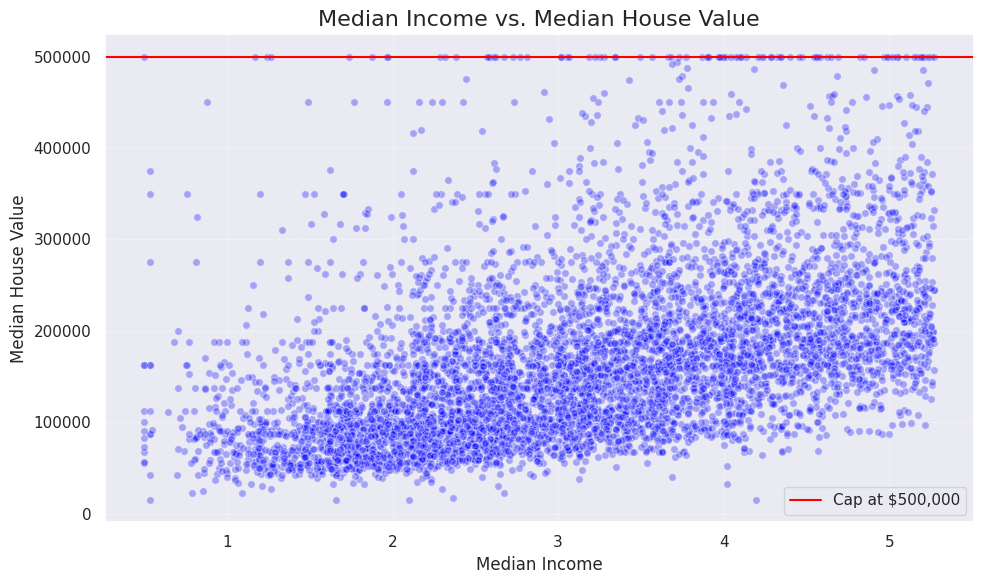

In [ ]:
# income vs median house value
sns.set(style='dark')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df['median_income'],
    df['median_house_value'],
    alpha=0.3,
    color='blue',
    edgecolors='white',
    s=30
)


plt.title('Median Income vs. Median House Value', fontsize=16)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)

plt.axhline(y=500000, color='red', linestyle='-', linewidth=1.5, label='Cap at $500,000')
plt.legend()

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()

plt.show()

In [ ]:
def univariate_analysis(col):
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20,12))
    axes[1].set_title('Histogram')
    sns.displot(data = df, x = col, ax = axes[1])
    
    axes[0].set_title('Boxplot')
    sns.boxplot(data = df, x = col, ax = axes[0])
    
    plt.tight_layout()

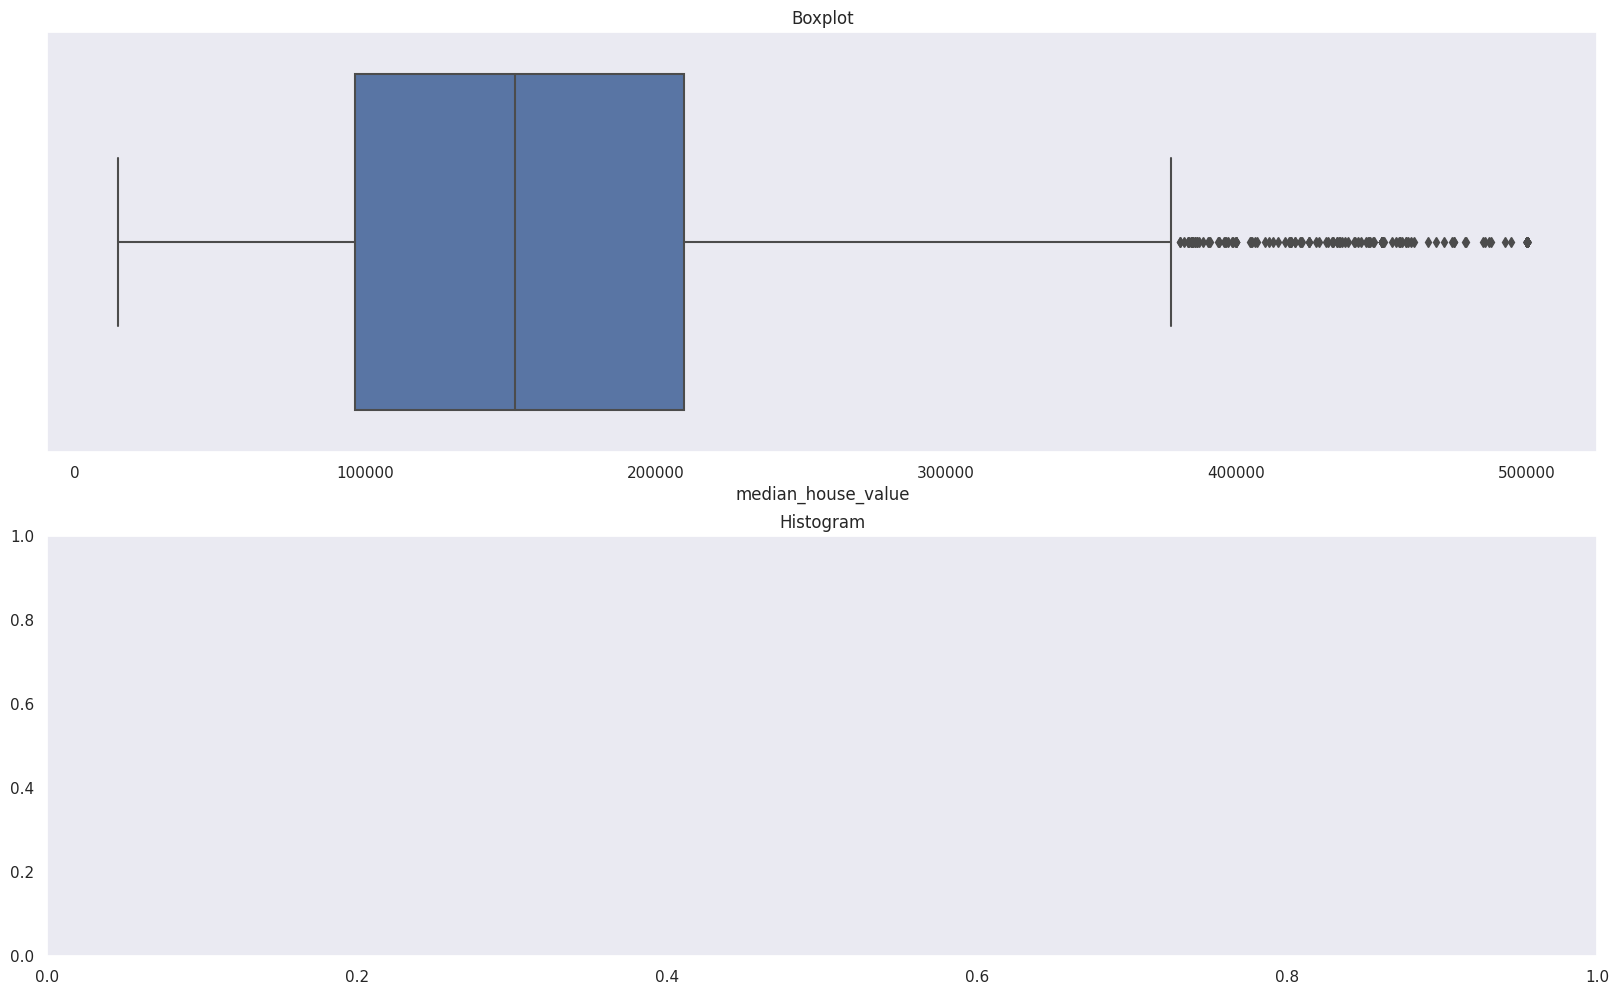

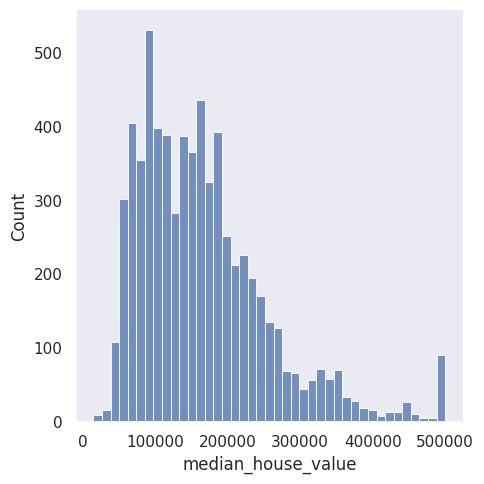

In [ ]:
univariate_analysis('median_house_value')

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='median_income', ylabel='median_house_value'>

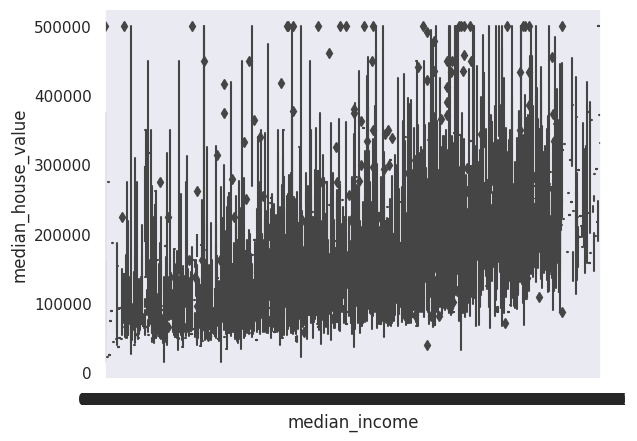

In [ ]:
sns.boxplot(data = df, x= 'median_income', y='median_house_value')

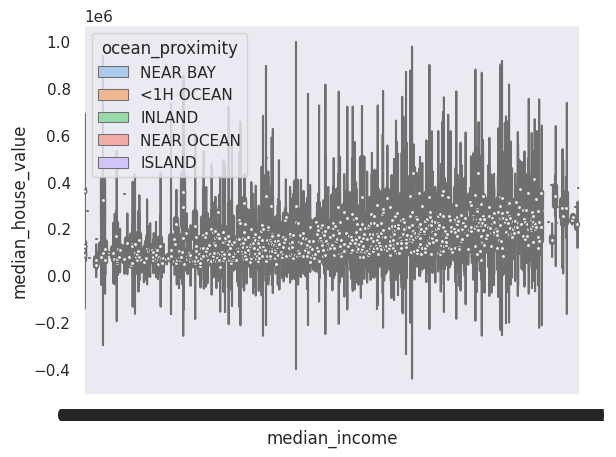

In [ ]:

sns.violinplot(x='median_income', y='median_house_value', data=df, hue='ocean_proximity',palette='pastel')

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df['RoomsPerHousehold'] = df['total_rooms'] / df['households']


In [ ]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
13    -122.26     37.84                52.0        696.0           191.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   

    population  households  median_income  median_house_value ocean_proximity  \
4        565.0       259.0         3.8462            342200.0        NEAR BAY   
5        413.0       193.0         4.0368            269700.0        NEAR BAY   
13       345.0       174.0         2.6736            191300.0        NEAR BAY   
15       697.0       264.0         2.1250            140000.0        NEAR BAY   
16       793.0       331.0         2.7750            152500.0        NEAR BAY   

    RoomsPerHousehold  
4            6.281853  
5            4.761658  
13           4.000000  
15           4.242424  
16           5.939577

In [ ]:
df['RoomsPerHousehold'] = df['RoomsPerHousehold'].astype('int')

In [ ]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
13    -122.26     37.84                52.0        696.0           191.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   

    population  households  median_income  median_house_value ocean_proximity  \
4        565.0       259.0         3.8462            342200.0        NEAR BAY   
5        413.0       193.0         4.0368            269700.0        NEAR BAY   
13       345.0       174.0         2.6736            191300.0        NEAR BAY   
15       697.0       264.0         2.1250            140000.0        NEAR BAY   
16       793.0       331.0         2.7750            152500.0        NEAR BAY   

    RoomsPerHousehold  
4                   6  
5                   4  
13                  4  
15                  4  
16                  5

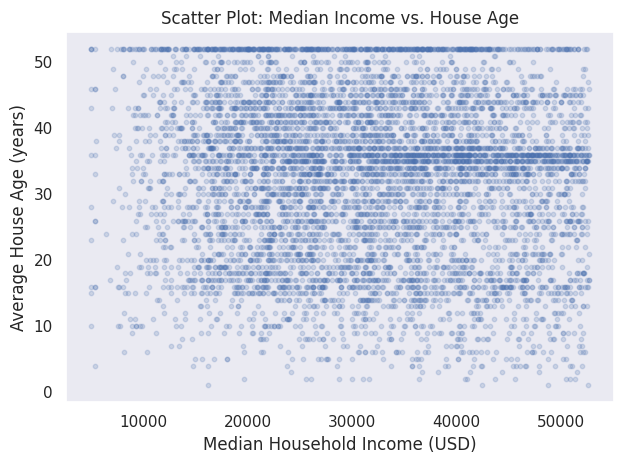

In [ ]:

plt.scatter(df['median_income'] * 10000, df['housing_median_age'], alpha=0.2, s=10)
plt.xlabel('Median Household Income (USD)')
plt.ylabel('Average House Age (years)')
plt.title('Scatter Plot: Median Income vs. House Age')
plt.tight_layout()
plt.show()


Mostly every income prefer average age of house to own
Betwwm 30 - 40 age is most buyable house